# Weekly asingment 1

**This is our first weekly asignment for the subject: data learning. In this notebook we are combining onformation from movement data and survey results.

*1. Read in and merge the two data sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

steps_df = pd.read_csv("steps.csv", sep=";")
survey_df = pd.read_csv("survey.csv")

survey_df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [2]:
steps_df.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*2. Merge the data

In [3]:
merged_df = survey_df.merge(steps_df, on="id")
merged_df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*3. Create a boxplot to look at outliers

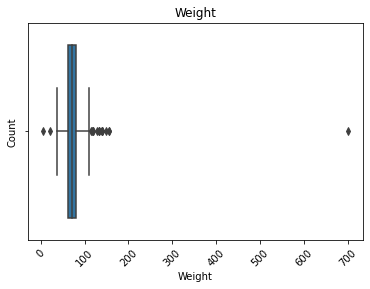

In [4]:
sns.boxplot(x="weight", data=merged_df)
plt.title("Weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

*4. Replace the outlier

In [5]:
merged_df["weight"]=merged_df["weight"].replace(700,np.nan)


*5. Add the mean steps to the merged dataset

In [6]:
merged_df["m_steps"] = merged_df.loc[:, "20-6-2013":].mean(axis=1)
merged_df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,m_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


*6. Make a histogram and boxplot of m_steps to find the mean, median ans standaard deviatie

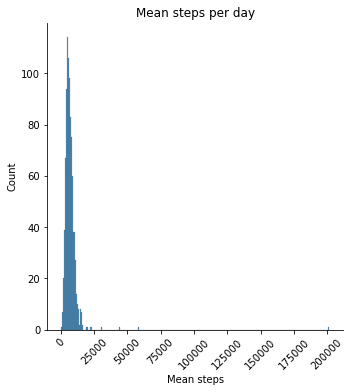

In [7]:
sns.displot(x="m_steps", kde=False, data=merged_df)
plt.title("Mean steps per day")
plt.xlabel("Mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

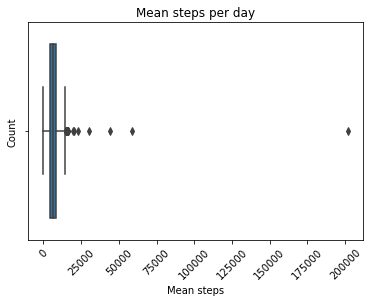

In [8]:
sns.boxplot(x="m_steps", data=merged_df)
plt.title("Mean steps per day")
plt.xlabel("Mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [9]:
print("Median:"+str(merged_df["m_steps"].median()))
print("Mean:"+str(merged_df["m_steps"].mean()))
print("Standaard deviatie:"+str(merged_df["m_steps"].std()))

Median:6245.006060606061
Mean:7036.627484984338
Standaard deviatie:7396.87900787018


*7. Clear outliers and try again

In [10]:
merged_df=merged_df[merged_df["m_steps"]<100000]

print("Median:"+str(merged_df["m_steps"].median()))
print("Mean:"+str(merged_df["m_steps"].mean()))
print("Standaard deviatie:"+str(merged_df["m_steps"].std()))

Median:6244.931601731601
Mean:6825.928380530858
Standaard deviatie:3696.491961554726


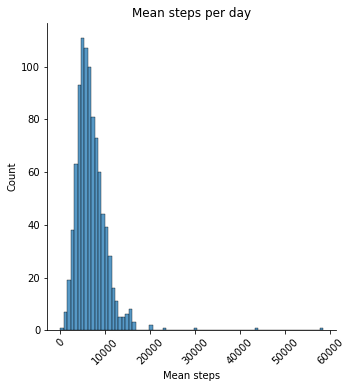

In [11]:
sns.displot(x="m_steps", kde=False, data=merged_df)
plt.title("Mean steps per day")
plt.xlabel("Mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

*8. Analyse differences in steps between age groups and educational backgrounds

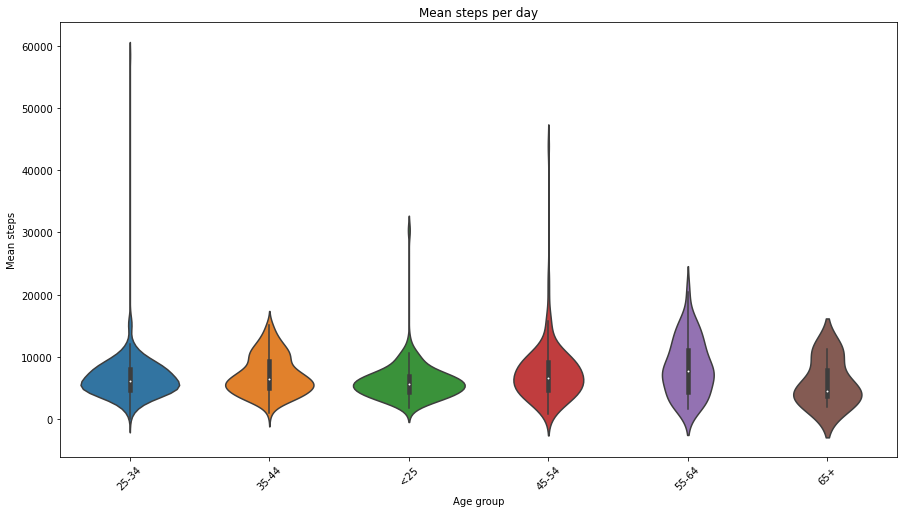

In [14]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
sns.violinplot(x="age", y="m_steps", data=merged_df)
plt.title("Mean steps per day")
plt.xlabel("Age group")
plt.ylabel("Mean steps")
plt.show()